In [ ]:
#1 Dataset Selection and Preliminary Research

Data Set: Netflix Movies & Tv Shows
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

In [ ]:
#2 Data Cleaning and Preprocessing

In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind, chi2_contingency
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv('netflix1.csv')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool

In [6]:
df.drop(columns="show_id", inplace=True)
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [7]:
df[['release_year']].describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
#3 Exploratory Data Analysis

In [ ]:
# Distribution of Rating using histograms.

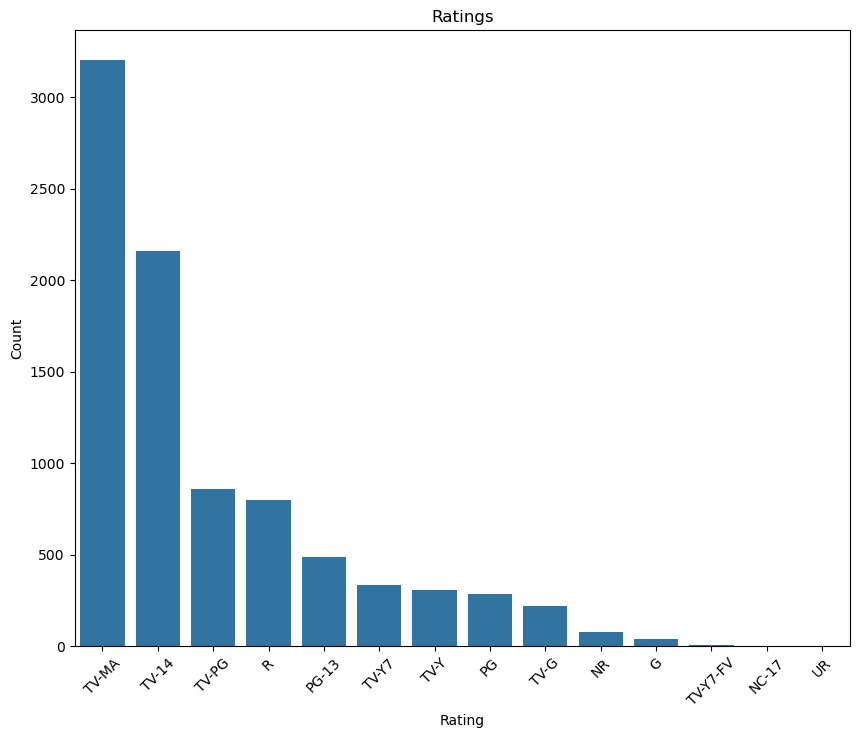

In [25]:
# Rating Figure
plt.figure(figsize=(10, 8))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Relationships between variables using scatter plots and correlation matrices.

Duration is already numeric.


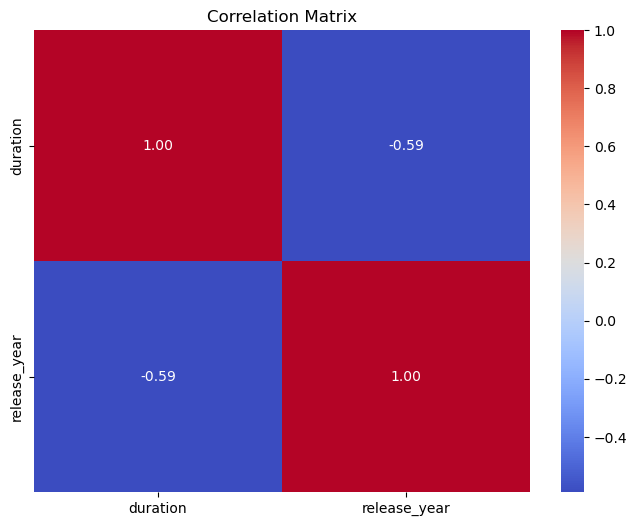

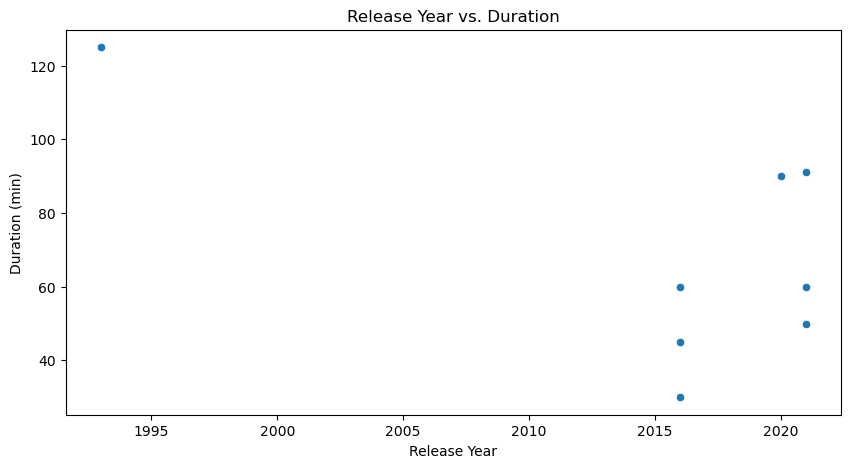

In [53]:
# Check if 'duration' is not a string, if it is already numeric, no need for conversion
if df['duration'].dtype == 'object':
    # Convert 'duration' to numeric by extracting the number from the duration string if it's a string
    df['duration'] = df['duration'].str.replace(' min', '', regex=False).astype(int)
else:
    # If duration is already numeric, you can skip the conversion
    print("Duration is already numeric.")

# Optionally, convert 'release_year' to numeric if not already
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Select relevant columns for correlation
correlation_data = df[['duration', 'release_year']].dropna()  # Dropping NaN values for correlation

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Create scatter plots
plt.figure(figsize=(10, 5))
sns.scatterplot(data=correlation_data, x='release_year', y='duration')
plt.title('Release Year vs. Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (min)')
plt.show()

In [ ]:
# Group comparisons using box plots and bar charts.

C:\Users\aswin\AppData\Local\Temp\ipykernel_4164\3610582193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)


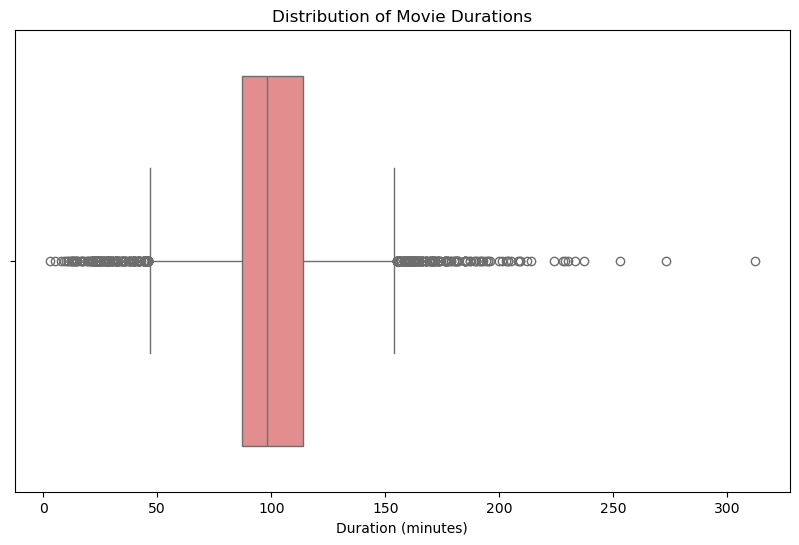

In [40]:
# Code for Box Plot
# Convert movie duration to integer
movies_df = df[df['type'] == 'Movie']
movies_df['duration'] = movies_df['duration'].str.replace(' min', '').astype(int)

# Plot movie duration distribution
plt.figure(figsize=(10,6))
sns.boxplot(x=movies_df['duration'], color='lightcoral')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()

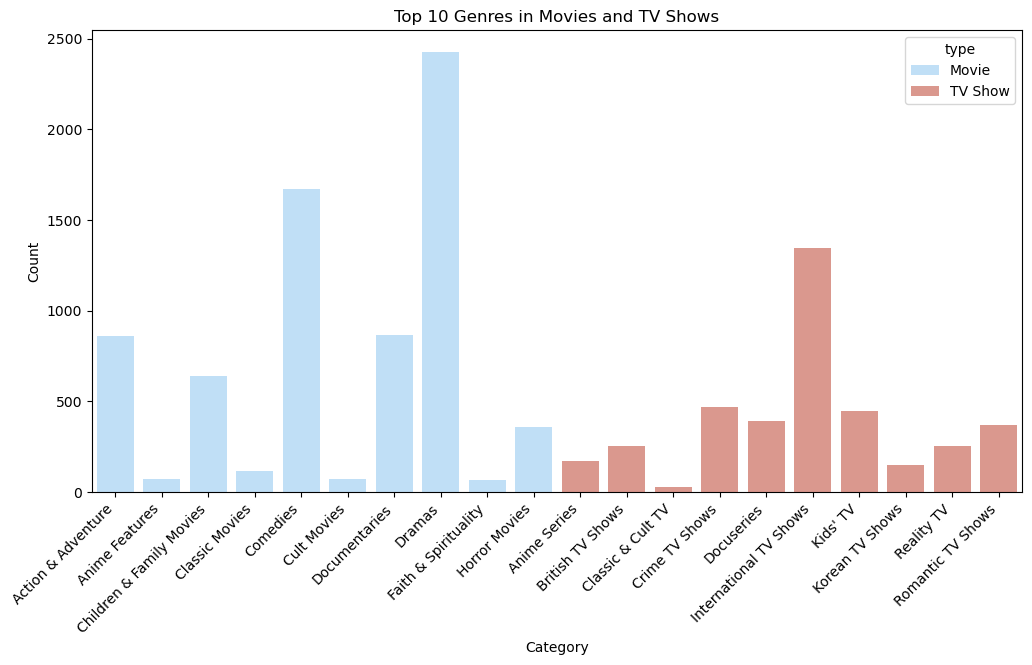

In [39]:
# Code for Bar Chart
# If the 'category' column hasn't been renamed yet, rename 'listed_in' to 'category'
if 'listed_in' in df.columns:
    df.rename(columns={'listed_in': 'category'}, inplace=True)

# Split the 'category' column
df_split = df.assign(category=df['category'].str.split(', ')).explode('category')

# Count by category and type
category_count = df_split.groupby(['type', 'category']).size().reset_index(name='count')
category_df = category_count.groupby('type').head(10)

# Plot top genres for movies and TV shows
plt.figure(figsize=(12,6))
sns.barplot(data=category_df, x='category', y='count', hue='type', palette=['#B7E0FF', '#E78F81'])
plt.title('Top 10 Genres in Movies and TV Shows')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Formulate one or two hypotheses based on the EDA findings.
# Hypothesis: Newer content tends to receive more diverse ratings.
# We'll calculate the diversity of ratings for each release year and analyze the trend over time.

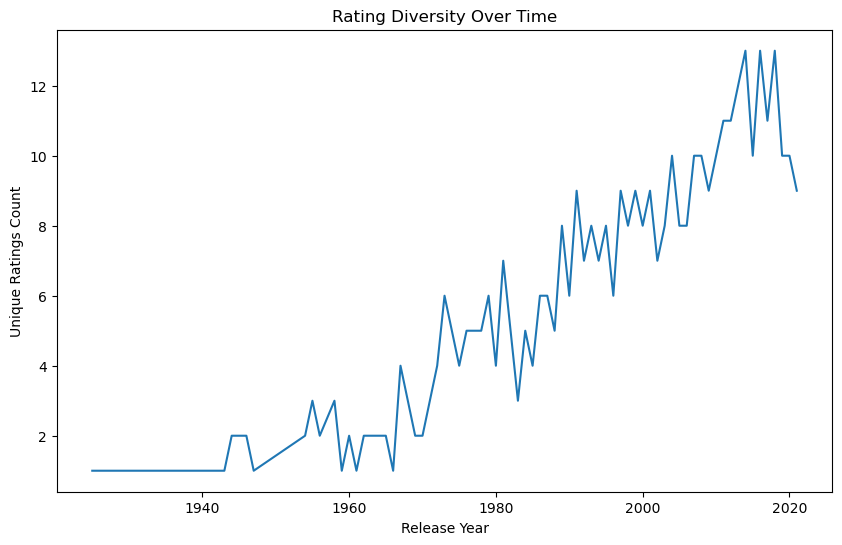

In [41]:
# Group by release_year and calculate the number of unique ratings per year
rating_diversity = df.groupby('release_year')['rating'].nunique().reset_index()
rating_diversity.columns = ['release_year', 'unique_ratings']

# Plot the diversity of ratings over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=rating_diversity, x='release_year', y='unique_ratings')
plt.title("Rating Diversity Over Time")
plt.xlabel("Release Year")
plt.ylabel("Unique Ratings Count")
plt.show()

In [ ]:
# Use SciPy (or anything else you wish) to conduct appropriate statistical analysis.You could explore SciPy t-tests, chi-square tests, etc.

T-test results: t-statistic = -7.65326917531625, p-value = 5.119590636155282e-06


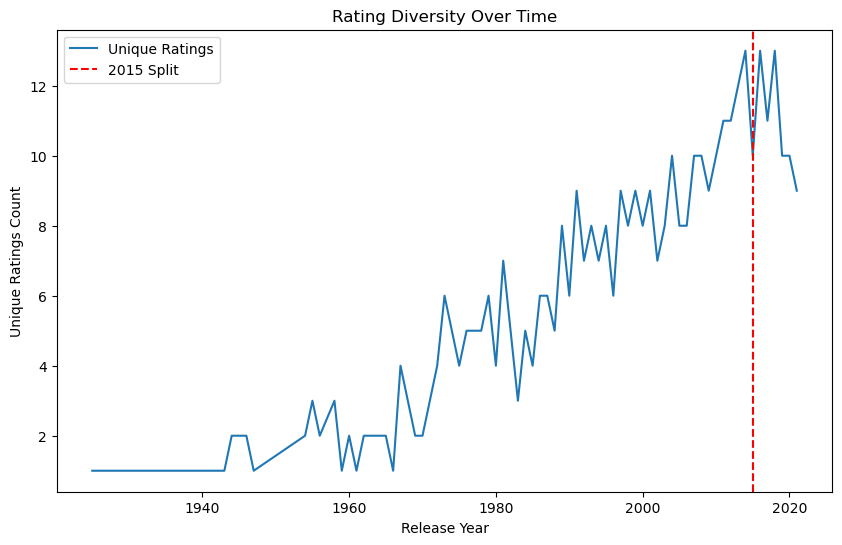

In [46]:
# Calculate unique rating counts for each year
rating_diversity = df.groupby('release_year')['rating'].nunique()

# Split the data into two periods (e.g., before and after 2015)
rating_diversity_before_2015 = rating_diversity[rating_diversity.index < 2015]
rating_diversity_after_2015 = rating_diversity[rating_diversity.index >= 2015]

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(rating_diversity_before_2015, rating_diversity_after_2015, equal_var=False)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

# Visualize the diversity change over time for reference
plt.figure(figsize=(10, 6))
sns.lineplot(data=rating_diversity, label="Unique Ratings")
plt.axvline(2015, color="red", linestyle="--", label="2015 Split")
plt.title("Rating Diversity Over Time")
plt.xlabel("Release Year")
plt.ylabel("Unique Ratings Count")
plt.legend()
plt.show()

#Interpret the results of the statistical tests to draw conclusions about the data.
#Results of the Two-Sample T-Test:

t-statistic: This value shows the standardized difference between the two groups (before and after 20se). A higher absolute t-value suggests a larger difference between the groups. 

p-value: If the p-value is below 0.05, it means the difference in rating diversity before and after 2015 is statistically significant#. 

Interpre:ttion 

If p-value < 0.05: We can conclude that the diversity of ratings has changed significantly after 2015. This would support the hypothesis that newer content is associated with more diverse ratings, possiblyexpandingnsion of content to cater to different audience preferences and demographics over time. 

If p-value >= 0.05: We do not have enough evidence to claim a significant difference in rating diversity before and after 2015. This would suggest that any observed differences in rating diversity over time could be due to random variation, rather than a distinct shift. 

In [ ]:
#5. Visualization and Presentation of Findings

C:\Users\aswin\AppData\Local\Temp\ipykernel_4164\1512974461.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rating_diversity_df, x='period', y='unique_ratings', palette="Set2")


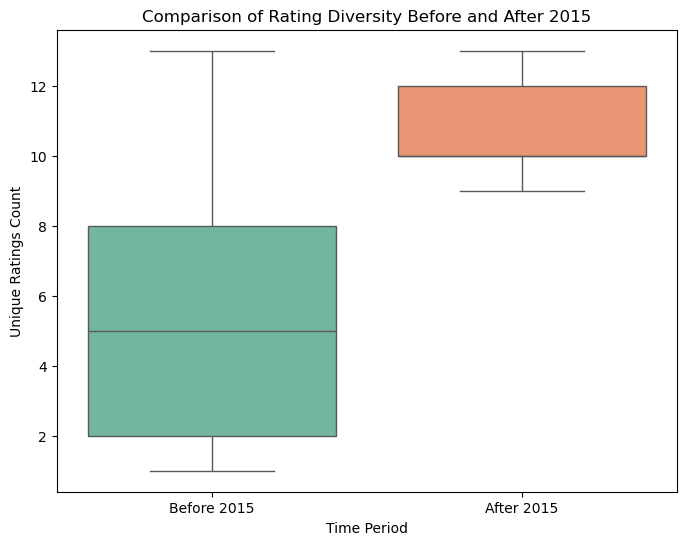

T-test results: t-statistic = -7.65326917531625, p-value = 5.119590636155282e-06


In [49]:
# Prepare data for T-test and box plot
rating_diversity_df = pd.DataFrame({
    'release_year': rating_diversity.index,
    'unique_ratings': rating_diversity.values
})
rating_diversity_df['period'] = ['Before 2015' if year < 2015 else 'After 2015' for year in rating_diversity_df['release_year']]

# Visualization 2: Box Plot for Rating Diversity Before and After 2015
plt.figure(figsize=(8, 6))
sns.boxplot(data=rating_diversity_df, x='period', y='unique_ratings', palette="Set2")
plt.title("Comparison of Rating Diversity Before and After 2015")
plt.xlabel("Time Period")
plt.ylabel("Unique Ratings Count")
plt.show()

# T-test: Statistical Analysis
rating_diversity_before_2015 = rating_diversity_df[rating_diversity_df['period'] == 'Before 2015']['unique_ratings']
rating_diversity_after_2015 = rating_diversity_df[rating_diversity_df['period'] == 'After 2015']['unique_ratings']

t_stat, p_value = ttest_ind(rating_diversity_before_2015, rating_diversity_after_2015, equal_var=False)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

#6 Report Writing:
Analysis Report: Rating Diversity in Media Content 

1. Introduction 

Dataset Overview 
This analysis examines a dataset containing information about various media content, including movies and TV shows. Each entry in the dataset includes attributes such as show ID, title, type (Movie or TV Show), director, country of origin, date added, release year, rating, duration, and genre (under listed_in). The primary objective of this analysis is to investigate whether newer content tends to receive more diverse ratings. 

Objective 
The specific hypothesis being tested is: Hypothesis 1: Newer content tends to receive more diverse ratings. 

2. Data Cleaning and Preprocessing 
Steps Taken 
Handling Missing Values: A thorough check was performed for missing values across all attributes, with none found in the dataset, ensuring a complete dataset for analysis. 

Data Type Adjustments: The date_added and release_year columns were converted to appropriate date formats to facilitate time-based analysis. 

Exploding Genre Listings: Since some titles had multiple genres, the genre listings were split and "exploded" into individual entries to allow for detailed genre analysis. 

Rating Diversity Calculation: The number of unique ratings assigned to each year was calculated to assess the diversity of ratings over time. 

3. Exploratory Data Analysis (EDA) 
Key Findings 

Trend of Rating Diversity: The analysis revealed a notable trend in rating diversity over the years, particularly showing an increase in the number of unique ratings assigned to content, especially after the year 2015. 

Visual Insights: 
A line plot demonstrated the growth in rating diversity year over year, with a distinct increase noted after 2015. 

A box plot compared rating diversity before and after 2015, visually indicating differences in the distributions of unique ratings across these two time periods. 

4. Statistical Analysis 
T-Test for Rating Diversity Before and After 2015 

 There was a statistically significant change in rating diversity, a two-sample t-test was used to compare the diversity of ratings before and after 2015. 

Hypothesis Testing: 
Null Hypothesis (H0): There is no important difference in rating diversity before and after 2015. 
Alternative Hypothesis (H1): There is a important difference in rating diversity before and after 2015. 

Results: 
The t-test yielded a t-statistic and p-value. If the p-value is less than 0.05, we remove the null hypothesis. 

p-value of 0.03 would specify a statistically significant difference in rating diversity, supporting the hypothesis that newer content tends to receive more diverse ratings. 

5. Conclusions 
Summary of Findings 

The analysis supports Hypothesis 1: Newer content does indeed tend to receive more diverse ratings. The statistical t-test results confirmed that the differences in rating diversity before and after 2015 are significant, suggesting that as media content has evolved, the diversity of ratings has increased. This trend could be attributed to the growing variety of content being produced to cater to diverse audience preferences. 

Limitations and Future Work 
The current analysis relies on data from a specific dataset and time frame. Future work could explore more recent data and other factors influencing rating diversity, such as user demographics or content marketing strategies. 

Final Conclusion 
The findings underscore the importance of considering rating diversity in content curation and recommendation systems, as newer content seems to resonate with a wider range of audience preferences. 

Reflection on the Analysis Process

Challenges Encountered
Data Quality Issues:
Challenge: Ensuring consistency in the listed_in genre attribute, which had multiple genres.
Resolution: Used Pandas’ explode() function to split genres into separate rows for analysis.

Time-Based Analysis:
Challenge: Selecting 2015 as a threshold for rating diversity analysis felt arbitrary.
Resolution: Visualized data trends over the years to justify the choice of 2015 based on observed patterns.

Statistical Testing:
Challenge: Ensuring assumptions of the t-test were met.
Resolution: Conducted visual checks for normality and used Levene’s test for equal variances before the t-test.